## Introduction
In this project, we have to identify the emotion from the text. 

## Dataset description


## Importing imortant libraries

In [8]:
import pandas as pd
import nltk

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Loading dataset

In [9]:
dataset_path = '../ml/data/ISEAR.csv'
emotion_data = pd.read_csv(dataset_path)

In [10]:
emotion_data.head()

0      joy  \
0  1     fear   
1  2    anger   
2  3  sadness   
3  4  disgust   
4  5    shame   

  On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.  
0  Every time I imagine that someone I love or I ...                                                                                                                         
1  When I had been obviously unjustly treated and...                                                                                                                         
2  When I think about the short time that we live...                                                                                                                         
3  At a gathering I found myself involuntarily si...                                                                                                                         
4  When I realized that I was directing the feeli...

In [11]:
emotion_data_array = emotion_data.values

In [12]:
emotion_data.shape

(7445, 3)

In [13]:
labels, sentence_collection = emotion_data_array[:, 1], emotion_data_array[:, 2]

## Text Augmentation
Since, we have not enough dataset for multiclass classification, we are using the method of text augmentation. We are using the library called, `nlpaug`.

In [14]:
import nlpaug.augmenter.word as naw

from nlpaug.util import Action

In [15]:
aug = naw.SynonymAug(aug_src='wordnet')
# augmented_text = aug.augment(text)
# print("Before: ", text, "\nAfter: ", augmented_text)
# augmented_text = aug.augment(text)
# print("\nBefore: ", text, "\nAfter: ", augmented_text)

In [16]:
data_struc = {'emotion_label': [], 'emotion_text': []}
aug_dataframe = pd.DataFrame(data_struc)

In [17]:
aug_dataframe

Empty DataFrame
Columns: [emotion_label, emotion_text]
Index: []

Here, we are using two augmentation techniques, namely, `synonyms augmentation` and `random word swapping`.

In [ ]:
for label, sentence in zip(labels, sentence_collection):
    if sentence.find("\n") > 0:
        sentence = sentence.replace("\n", "")
        augmented_sent = aug.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': sentence},
            ignore_index=True
        )
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent},
            ignore_index=True
        )
        augmented_sent = aug.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent},
            ignore_index=True
        )
    
        aug1 = naw.RandomWordAug(action="swap")
        augmented_sent1 = aug1.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent1},
            ignore_index=True
        )
    else:
        augmented_sent = aug.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': sentence},
            ignore_index=True
        )
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent},
            ignore_index=True
        )
        augmented_sent = aug.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent},
            ignore_index=True
        )
        aug1 = naw.RandomWordAug(action="swap")
        augmented_sent1 = aug1.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent1},
            ignore_index=True
        )

In [18]:
aug_array = aug_dataframe.values

In [19]:
aug_dataframe.shape

(29783, 2)

In [20]:
aug_array[:, 1]

array(['Every time I imagine that someone I love or I could contact a  serious illness, even death.',
       'Every time I envisage that someone I love operating theater I could reach a serious illness , even end .',
       'Every time I envisage that someone I love operating theater I could reach a serious illness , even end .',
       ...,
       'Once I dispute with my sister and after this I deliberately messed upwards her property .',
       'Once I dispute with my sister and after this I deliberately messed upwards her property .',
       'Once I dispute with my sister and after this I deliberately messed upwards her property .'],
      dtype=object)

In [21]:
labels, sentence_collection = aug_array[:, 0], aug_array[:, 1]

In [22]:
labels

array(['fear', 'fear', 'fear', ..., 'guilt', 'guilt', 'guilt'],
      dtype=object)

### Tokenization

In [23]:
whitespace_tokenizer = nltk.tokenize.WhitespaceTokenizer()
treebank_tokenizer = nltk.tokenize.TreebankWordTokenizer()

In [24]:
whitespace_tokenized_sentences = []
for sentence in sentence_collection:
    whitespace_tokenized_sentences.append(
                                    whitespace_tokenizer.tokenize(sentence)
                                    )

In [25]:
treebank_tokenized_sentences = []
for sentence in sentence_collection:
    treebank_tokenized_sentences.append(treebank_tokenizer.tokenize(sentence))

### Token normalization

In [26]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [27]:
lemmatized_sentences = []
for sentence in treebank_tokenized_sentences:
    lemmatized_sentences.append(" ".join(lemmatizer.lemmatize(token.lower()) for token in sentence))

In [28]:
from nltk.corpus import stopwords
from string import punctuation

StopWords = set(stopwords.words('english'))

preprocessed_sentences = []
for sentence in lemmatized_sentences:
    tem_sentence = ""
    for word in sentence.split(" "):
        if word in punctuation:
            pass
        elif word.find("!") >= 0:
            print(word)
        elif word not in StopWords:
            tem_sentence += word + " "
    preprocessed_sentences.append(tem_sentence.strip())

In [29]:
import numpy as np

X_data = np.array(preprocessed_sentences)

In [30]:
labels.shape

(29783,)

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
encoder = OrdinalEncoder()
encoded_label = encoder.fit_transform(X=(labels.reshape(-1, 1)))

In [33]:
encoded_label

array([[2.],
       [2.],
       [2.],
       ...,
       [3.],
       [3.],
       [3.]])

In [34]:
tf_vectorizer = TfidfVectorizer()
X_features = tf_vectorizer.fit_transform(X_data)

In [35]:
X_values = X_features.toarray()

In [36]:
y_values = encoded_label.ravel()

In [37]:
X_values.shape

(29783, 11484)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2)

In [39]:
X_train.shape[0]

23826

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [48]:
y_predicted = model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_test, y_predicted)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       883
         1.0       0.90      0.90      0.90       831
         2.0       0.91      0.94      0.93       835
         3.0       0.88      0.86      0.87       819
         4.0       0.92      0.95      0.93       864
         5.0       0.91      0.90      0.90       846
         6.0       0.88      0.86      0.87       879

    accuracy                           0.90      5957
   macro avg       0.90      0.90      0.90      5957
weighted avg       0.90      0.90      0.90      5957



In [43]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.8)
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.8, class_prior=None, fit_prior=True)

In [44]:
y_predicted = nb_model.predict(X_test)

In [45]:
accuracy_score(y_test, y_predicted)

0.7955346650998825

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.constraints import max_norm
import tensorflow.keras.backend

In [53]:
model = Sequential()

model.add(Dense(125, input_dim=X_values.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

sgd = SGD(lr=0.03)

model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [54]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=20)

Train on 23826 samples, validate on 5957 samples
Epoch 1/50
23826/23826 [==============================] - 15s 613us/sample - loss: 1.9448 - accuracy: 0.1495 - val_loss: 1.9388 - val_accuracy: 0.1450
Epoch 2/50
23826/23826 [==============================] - 12s 512us/sample - loss: 1.9313 - accuracy: 0.1884 - val_loss: 1.9117 - val_accuracy: 0.3824
Epoch 3/50
23826/23826 [==============================] - 12s 512us/sample - loss: 1.8923 - accuracy: 0.2504 - val_loss: 1.8406 - val_accuracy: 0.5034
Epoch 4/50
23826/23826 [==============================] - 12s 509us/sample - loss: 1.7961 - accuracy: 0.3246 - val_loss: 1.6872 - val_accuracy: 0.4460
Epoch 5/50
23826/23826 [==============================] - 12s 501us/sample - loss: 1.6320 - accuracy: 0.4044 - val_loss: 1.4778 - val_accuracy: 0.5179
Epoch 6/50
23826/23826 [==============================] - 10s 425us/sample - loss: 1.4573 - accuracy: 0.4763 - val_loss: 1.2913 - val_accuracy: 0.6005
Epoch 7/50
23826/23826 [=====================

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

Text(91.68, 0.5, 'predicted label')

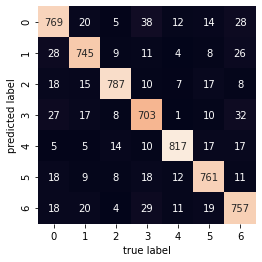

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, test_label))